In [13]:
# import from parent directory
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
sys.path.append("..")
from labplot import *

In [47]:
# with spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/synaptic_decay/nu_x_ff_coff_quench_brunel/20251029-160654-bb3sQ6R4")

c_e, c_i = 1.0, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_E_shared_with_spike = df

In [48]:
g_L = params["g_L"]
C = params["C"]
tau_m = (C / g_L) / 1000.0  # convert to seconds
V_L = params["E_L"]
Vth = params["Vth"]
Vre = params["Vre"]
tau_ref = params["tau_ref"]
tau_e_decay = params["tau_e_decay"] / 1000.0  # convert to seconds
tau_i_decay = params["tau_i_decay"] / 1000.0  # convert to seconds
V_i = params["E_i"]
V_e = params["E_e"]
g = params["g"]
a = params["a"]
K = params["K"]
gamma = params["gamma"]
eta = params["eta"]
J_e = a
J_i = a * g
K_e = K
K_i = K * gamma

nu_xs = df["nu_x"].to_numpy()
# get the max and min nu_x
nu_x_min = np.min(nu_xs)
nu_x_max = np.max(nu_xs)
# generate a linspace of nu_xs from min to max with 100 points
# nu_x_space = np.linspace(nu_x_min, nu_x_max, 100)
nu_x_space = nu_xs

r_e = nu_x_space
r_i = nu_x_space * eta

In [92]:
# without spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/synaptic_decay/nu_x_ff_coff_quench_brunel/20251029-183916-Dkqx773T")

c_e, c_i = 1.0, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_E_shared_without_spike = df

params_E_shared_without_spike = params

In [10]:
# with spike, only I shared

trials = collect_data("../../outputs/conductance/double_lif/synaptic_decay/nu_x_ff_coff_quench_brunel/20251029-162724-AEGoh6yI")

c_e, c_i = 0.0, 1.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_I_shared_with_spike = df

In [11]:
# without spike, only I shared

trials = collect_data("../../outputs/conductance/double_lif/synaptic_decay/nu_x_ff_coff_quench_brunel/20251029-171747-iF2Tsbqd")

c_e, c_i = 0, 1

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")
df_I_shared_without_spike = df

# Figure 1: Marginal and Joint Statistics

/var/folders/mb/f1_g1g0n1s13vfylsby2v1bm0000gn/T/ipykernel_45936/3016530412.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False)


Saved figure to fig1.png


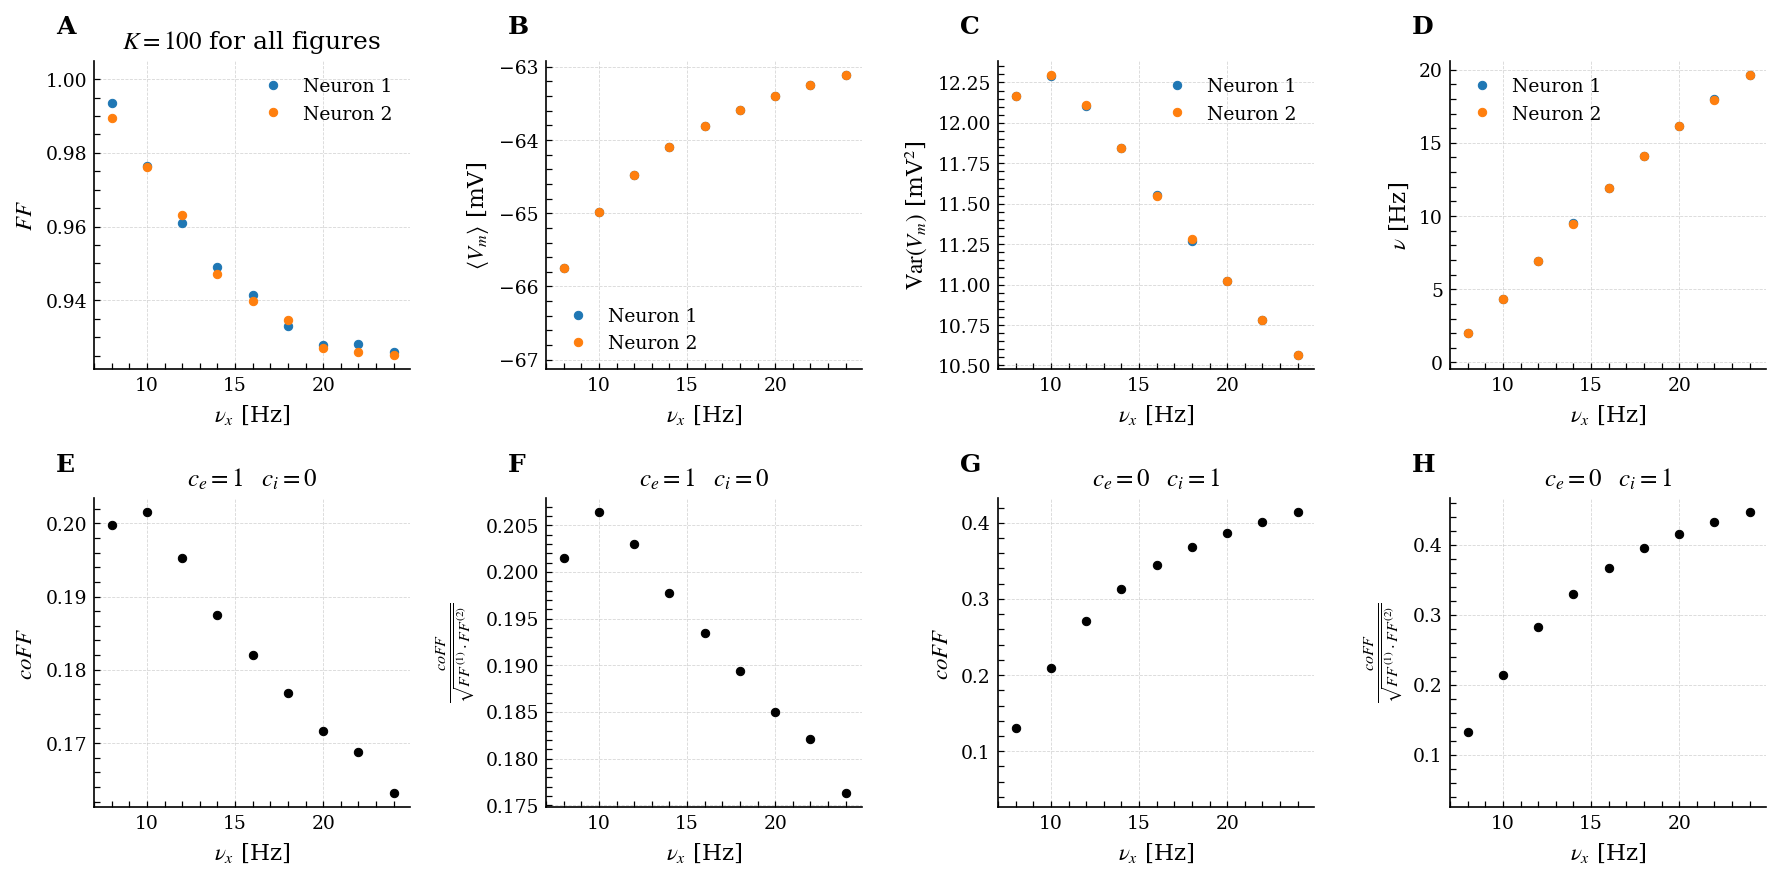

In [54]:
set_style()
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 4, figure=fig)

# marginal statistics, E shared with spike

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["fano_factor_1"], 'o', label="Neuron 1")
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["fano_factor_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$FF$")
ax.set_title(rf"$K={K}$ for all figures", fontsize=12)

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["mean_V_1"], 'o', label="Neuron 1")
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["mean_V_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\langle V_m \rangle$ [mV]")

ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["var_V_1"], 'o', label="Neuron 1")
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["var_V_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Var}(V_m)$ [mV$^2$]")

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["nu_1"], 'o', label="Neuron 1")
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["nu_2"], 'o', label="Neuron 2")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\nu$ [Hz]")

# joint staitistics, E shared with spike

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["co_fano_factor"] / np.sqrt(df_E_shared_with_spike["fano_factor_1"] * df_E_shared_with_spike["fano_factor_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# joint statistics, I shared with spike
ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["co_fano_factor"] / np.sqrt(df_I_shared_with_spike["fano_factor_1"] * df_I_shared_with_spike["fano_factor_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.legend(frameon=False)
    ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
savefig(fig, "fig1.png")
plt.show()

# Figure 2: Spike-Reset effect

## Ver 1

Saved figure to fig2.png


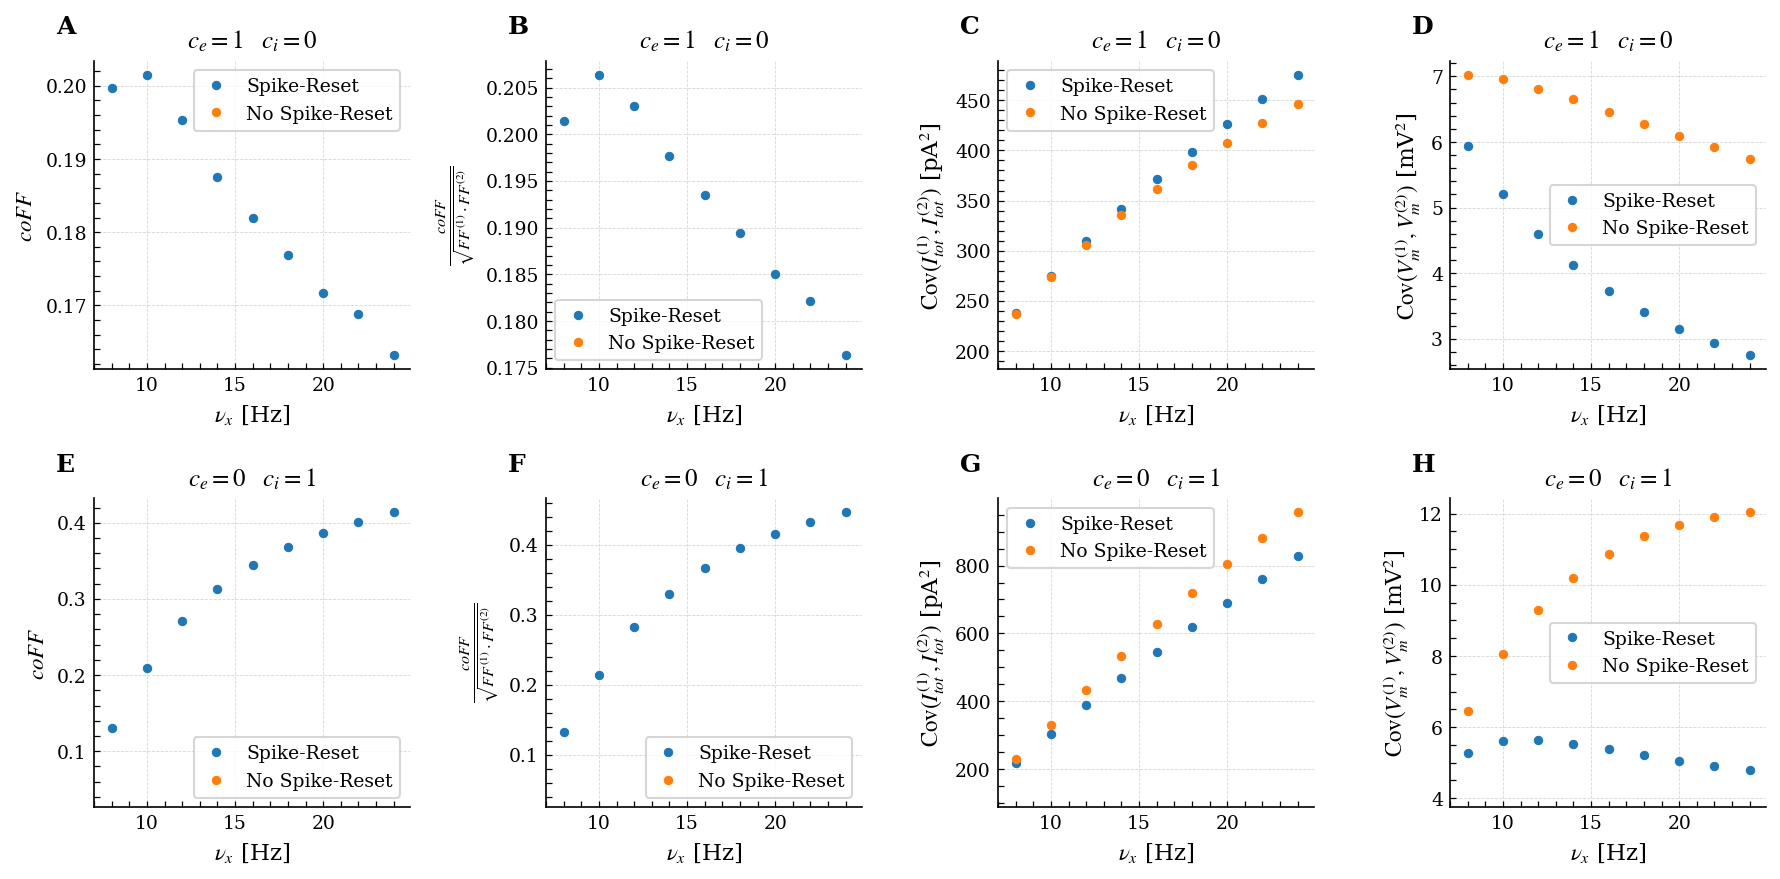

In [33]:
set_style()
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 4, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["co_fano_factor"], 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["co_fano_factor"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["co_fano_factor"] / np.sqrt(df_E_shared_with_spike["fano_factor_1"] * df_E_shared_with_spike["fano_factor_2"]), 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["co_fano_factor"] / np.sqrt(df_E_shared_without_spike["fano_factor_1"] * df_E_shared_without_spike["fano_factor_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_It1_It2"], 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_It1_It2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{tot}^{(1)}, I_{tot}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_V1_V2"], 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_V1_V2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(V_{m}^{(1)}, V_{m}^{(2)})$ [mV$^2$]")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["co_fano_factor"], 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["co_fano_factor"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["co_fano_factor"] / np.sqrt(df_I_shared_with_spike["fano_factor_1"] * df_I_shared_with_spike["fano_factor_2"]), 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["co_fano_factor"] / np.sqrt(df_I_shared_without_spike["fano_factor_1"] * df_I_shared_without_spike["fano_factor_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\frac{coFF}{\sqrt{FF^{(1)} \cdot FF^{(2)}}}$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_It1_It2"], 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_It1_It2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{tot}^{(1)}, I_{tot}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_V1_V2"], 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_V1_V2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(V_{m}^{(1)}, V_{m}^{(2)})$ [mV$^2$]")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.legend(frameon=True)
    ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
savefig(fig, "fig2.png")
plt.show()

Saved figure to fig2.png


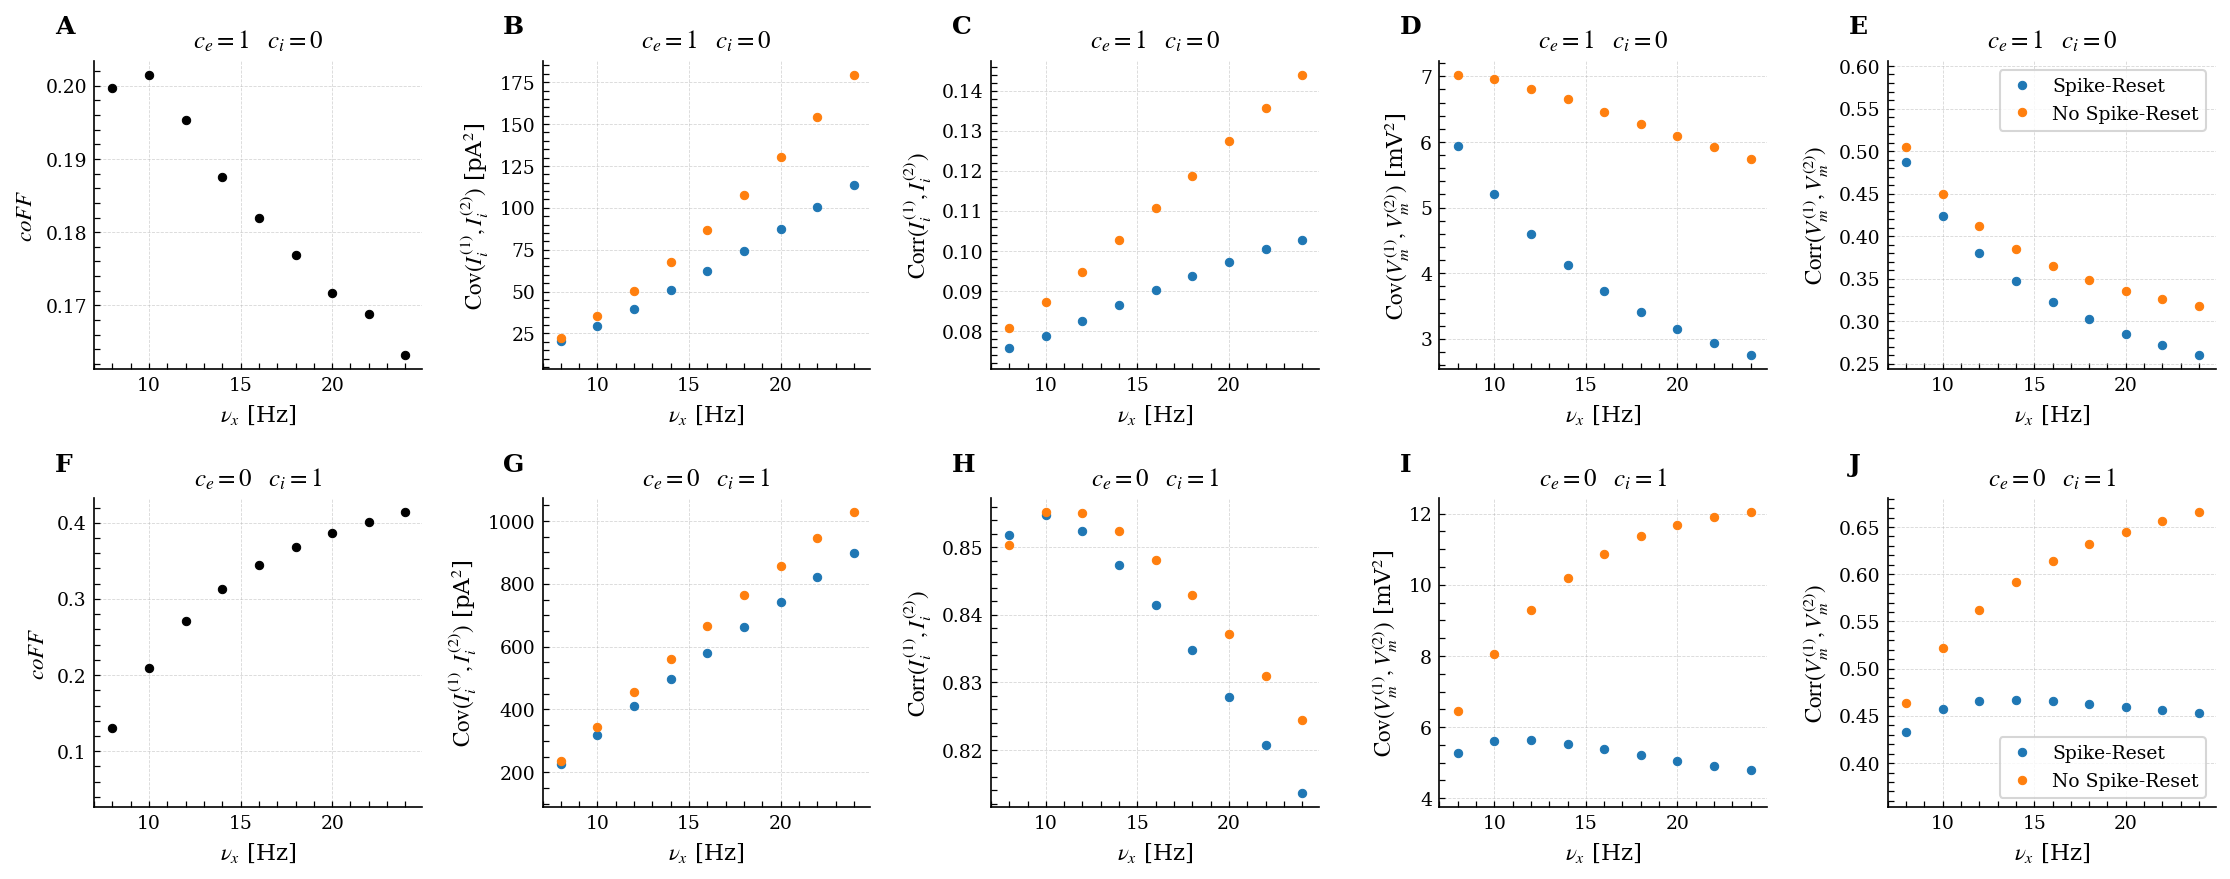

In [43]:
set_style()
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(2, 5, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_Ii1_Ii2"], 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ii1_Ii2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{i}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# normalize the covariance by the product of stds
ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_Ii1_Ii2"] / np.sqrt(df_E_shared_with_spike["var_I_i_1"] * df_E_shared_with_spike["var_I_i_2"]), 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ii1_Ii2"] / np.sqrt(df_E_shared_without_spike["var_I_i_1"] * df_E_shared_without_spike["var_I_i_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{i}^{(1)}, I_{i}^{(2)})$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_V1_V2"], 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_V1_V2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(V_{m}^{(1)}, V_{m}^{(2)})$ [mV$^2$]")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# normalize the covariance by the product of stds
ax = fig.add_subplot(gs[0, 4])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_V1_V2"] / np.sqrt(df_E_shared_with_spike["var_V_1"] * df_E_shared_with_spike["var_V_2"]), 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_V1_V2"] / np.sqrt(df_E_shared_without_spike["var_V_1"] * df_E_shared_without_spike["var_V_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(V_{m}^{(1)}, V_{m}^{(2)})$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)
ax.legend(frameon=True)

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_Ii1_Ii2"], 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ii1_Ii2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{i}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

# normalize the covariance by the product of stds
ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_Ii1_Ii2"] / np.sqrt(df_I_shared_with_spike["var_I_i_1"] * df_I_shared_with_spike["var_I_i_2"]), 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ii1_Ii2"] / np.sqrt(df_I_shared_without_spike["var_I_i_1"] * df_I_shared_without_spike["var_I_i_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{i}^{(1)}, I_{i}^{(2)})$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_V1_V2"], 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_V1_V2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(V_{m}^{(1)}, V_{m}^{(2)})$ [mV$^2$]")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 4])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_V1_V2"] / np.sqrt(df_I_shared_with_spike["var_V_1"] * df_I_shared_with_spike["var_V_2"]), 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_V1_V2"] / np.sqrt(df_I_shared_without_spike["var_V_1"] * df_I_shared_without_spike["var_V_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(V_{m}^{(1)}, V_{m}^{(2)})$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)
ax.legend(frameon=True)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
savefig(fig, "fig2.png")
plt.show()

## Version 2

Saved figure to fig2.png


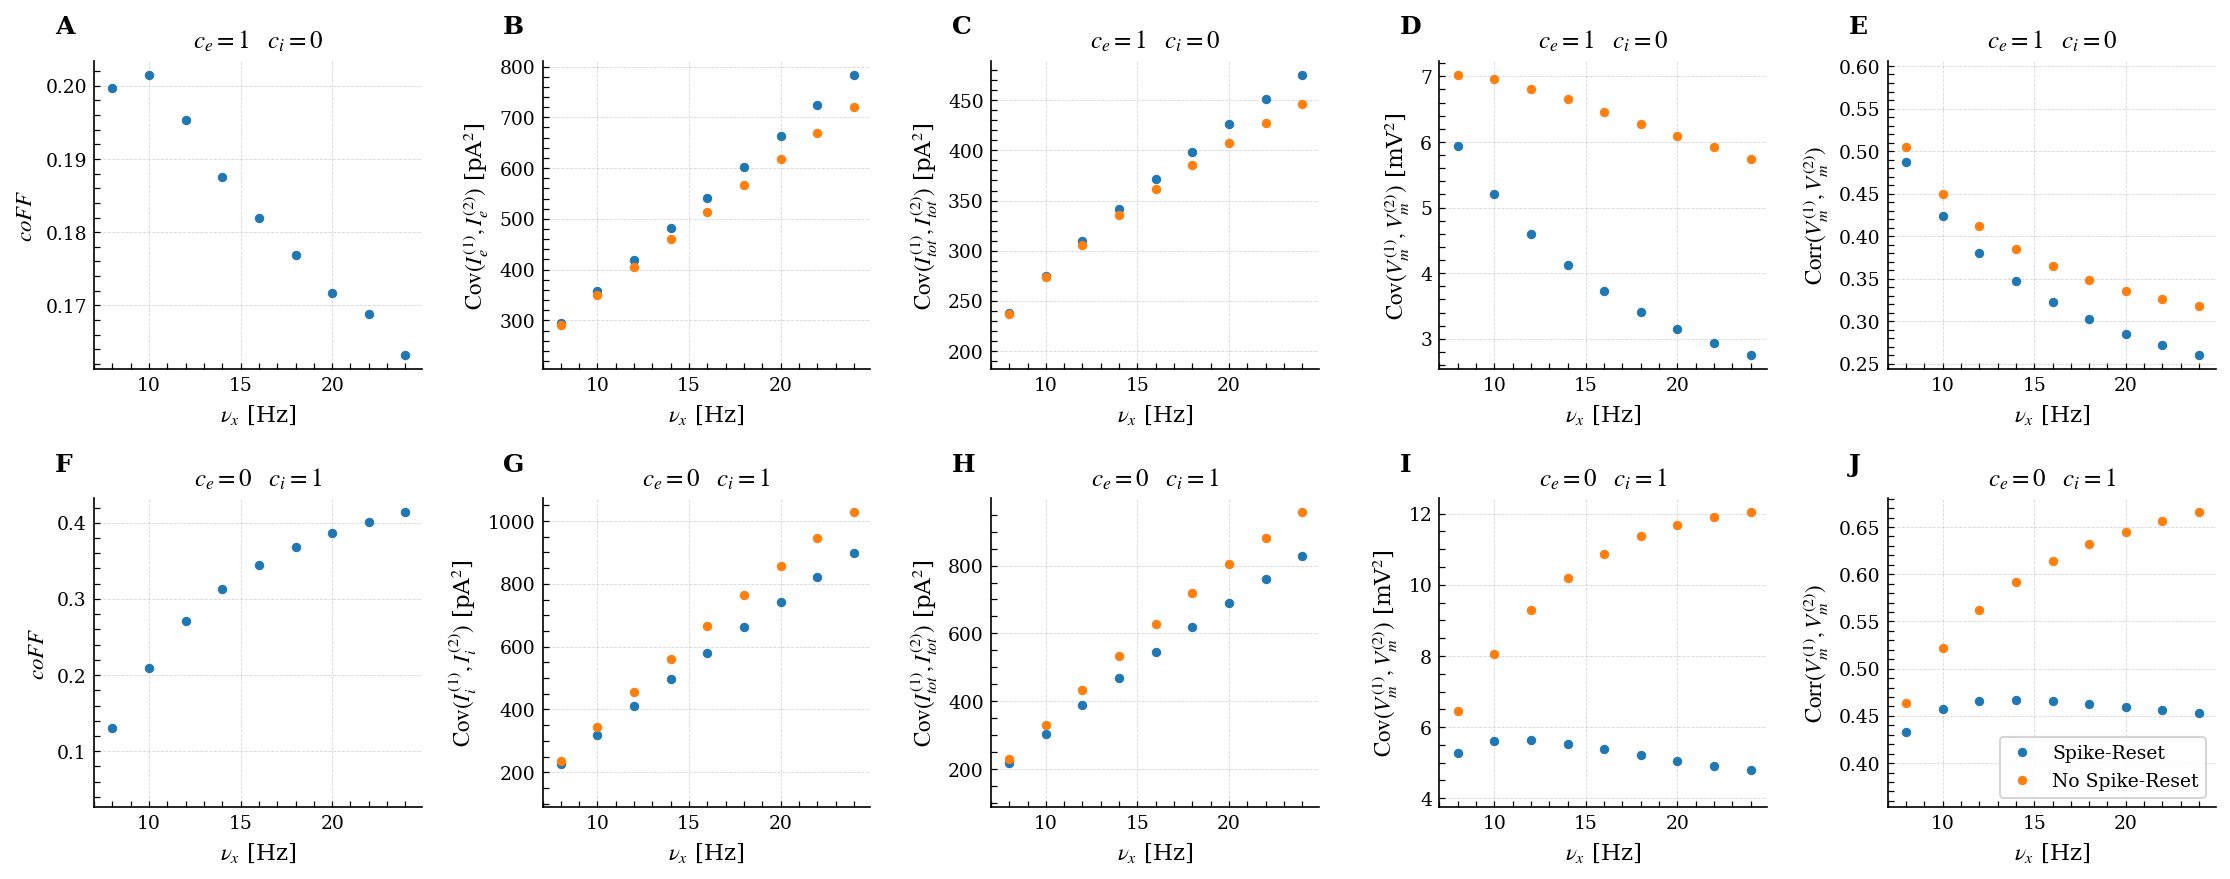

In [45]:
set_style()
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(2, 5, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["co_fano_factor"], 'o')
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_Ie1_Ie2"], 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ie1_Ie2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{e}^{(1)}, I_{e}^{(2)})$ [pA$^2$]")

ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_It1_It2"], 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_It1_It2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{tot}^{(1)}, I_{tot}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_V1_V2"], 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_V1_V2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(V_{m}^{(1)}, V_{m}^{(2)})$ [mV$^2$]")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[0, 4])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_V1_V2"] / np.sqrt(df_E_shared_with_spike["var_V_1"] * df_E_shared_with_spike["var_V_2"]), 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_V1_V2"] / np.sqrt(df_E_shared_without_spike["var_V_1"] * df_E_shared_without_spike["var_V_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(V_{m}^{(1)}, V_{m}^{(2)})$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["co_fano_factor"], 'o')
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_Ii1_Ii2"], 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ii1_Ii2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{i}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_It1_It2"], 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_It1_It2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{tot}^{(1)}, I_{tot}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_V1_V2"], 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_V1_V2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(V_{m}^{(1)}, V_{m}^{(2)})$ [mV$^2$]")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 4])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_V1_V2"] / np.sqrt(df_I_shared_with_spike["var_V_1"] * df_I_shared_with_spike["var_V_2"]), 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_V1_V2"] / np.sqrt(df_I_shared_without_spike["var_V_1"] * df_I_shared_without_spike["var_V_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(V_{m}^{(1)}, V_{m}^{(2)})$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)
ax.legend(frameon=True)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
savefig(fig, "fig2.png")
plt.show()

## Ver 3

Saved figure to fig2.png


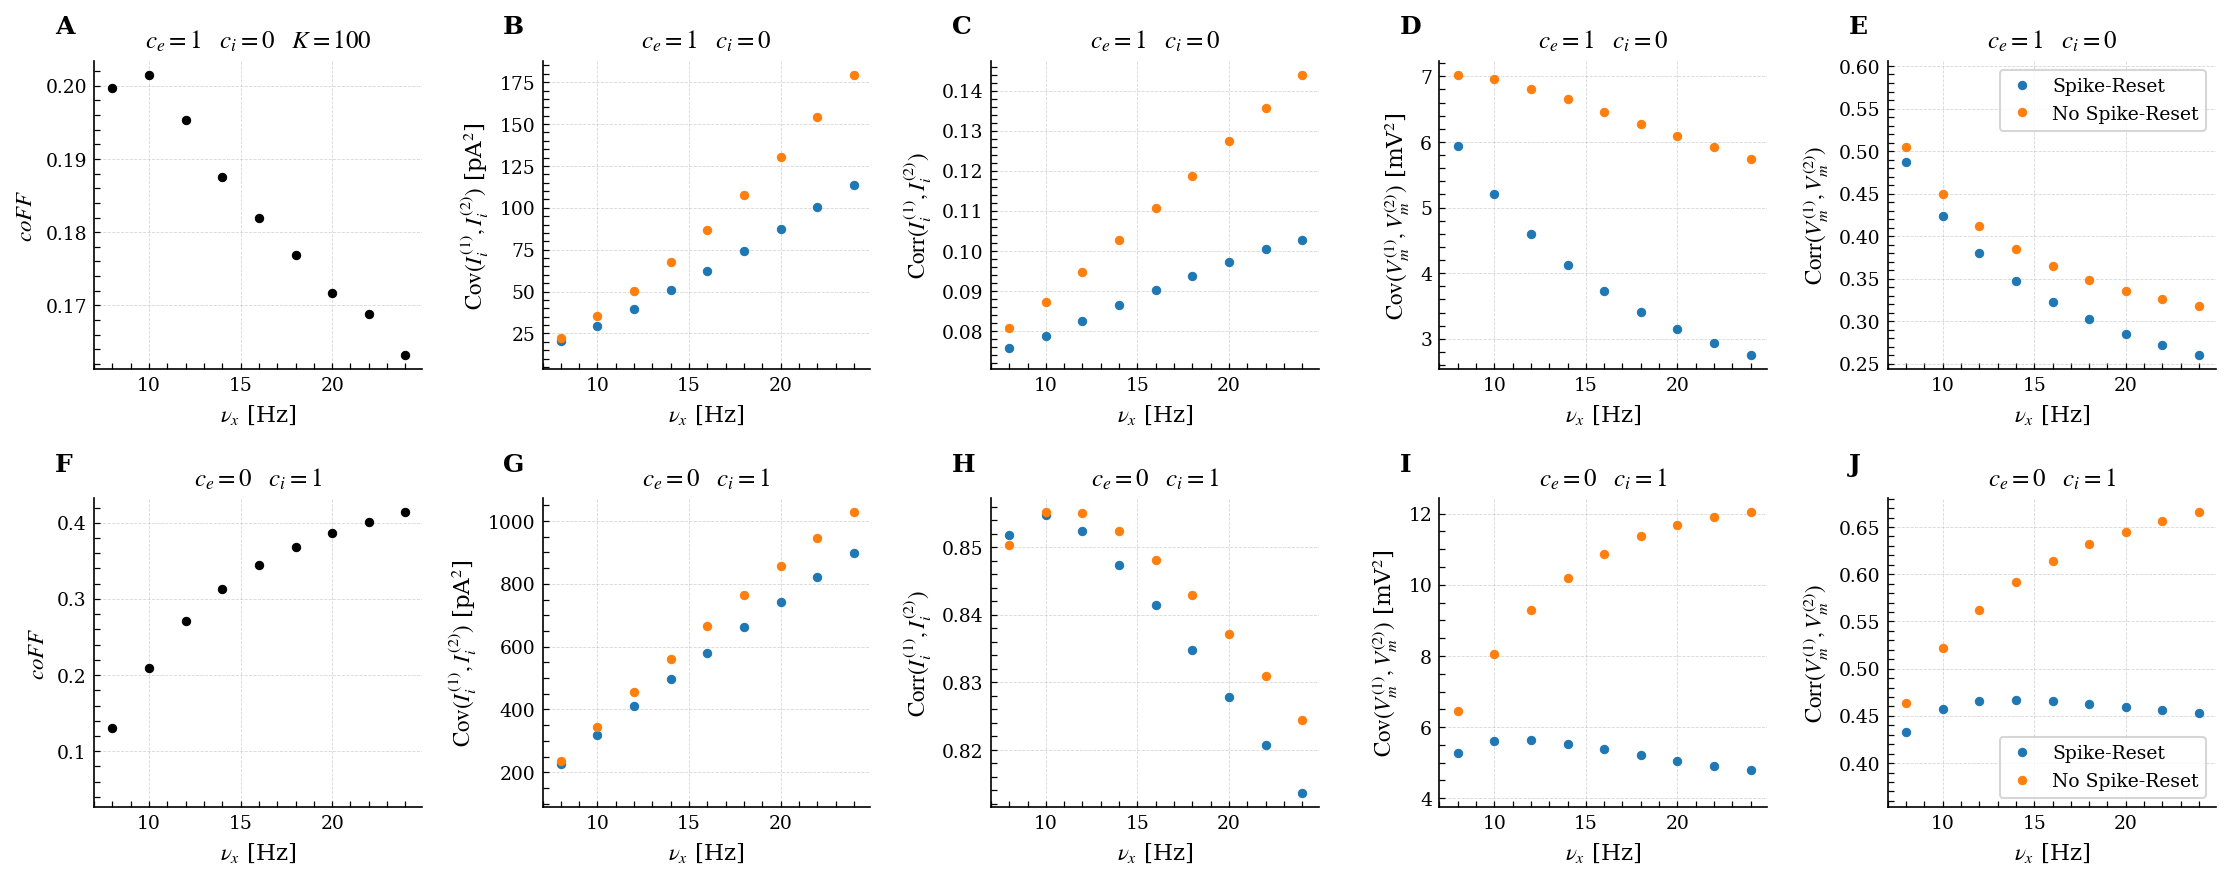

In [56]:
set_style()
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(2, 5, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}\quad K={K}$", fontsize=12)

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_Ii1_Ii2"], 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ii1_Ii2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{i}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# normalize the covariance by the product of stds
ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_Ii1_Ii2"] / np.sqrt(df_E_shared_with_spike["var_I_i_1"] * df_E_shared_with_spike["var_I_i_2"]), 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ii1_Ii2"] / np.sqrt(df_E_shared_without_spike["var_I_i_1"] * df_E_shared_without_spike["var_I_i_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{i}^{(1)}, I_{i}^{(2)})$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_V1_V2"], 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_V1_V2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(V_{m}^{(1)}, V_{m}^{(2)})$ [mV$^2$]")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# normalize the covariance by the product of stds
ax = fig.add_subplot(gs[0, 4])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_V1_V2"] / np.sqrt(df_E_shared_with_spike["var_V_1"] * df_E_shared_with_spike["var_V_2"]), 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_V1_V2"] / np.sqrt(df_E_shared_without_spike["var_V_1"] * df_E_shared_without_spike["var_V_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(V_{m}^{(1)}, V_{m}^{(2)})$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)
ax.legend(frameon=True)

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_Ii1_Ii2"], 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ii1_Ii2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{i}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

# normalize the covariance by the product of stds
ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_Ii1_Ii2"] / np.sqrt(df_I_shared_with_spike["var_I_i_1"] * df_I_shared_with_spike["var_I_i_2"]), 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ii1_Ii2"] / np.sqrt(df_I_shared_without_spike["var_I_i_1"] * df_I_shared_without_spike["var_I_i_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{i}^{(1)}, I_{i}^{(2)})$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_V1_V2"], 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_V1_V2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(V_{m}^{(1)}, V_{m}^{(2)})$ [mV$^2$]")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 4])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_V1_V2"] / np.sqrt(df_I_shared_with_spike["var_V_1"] * df_I_shared_with_spike["var_V_2"]), 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_V1_V2"] / np.sqrt(df_I_shared_without_spike["var_V_1"] * df_I_shared_without_spike["var_V_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(V_{m}^{(1)}, V_{m}^{(2)})$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)
ax.legend(frameon=True)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
savefig(fig, "fig2.png")
plt.show()

## Ver 4

Saved figure to fig2.png


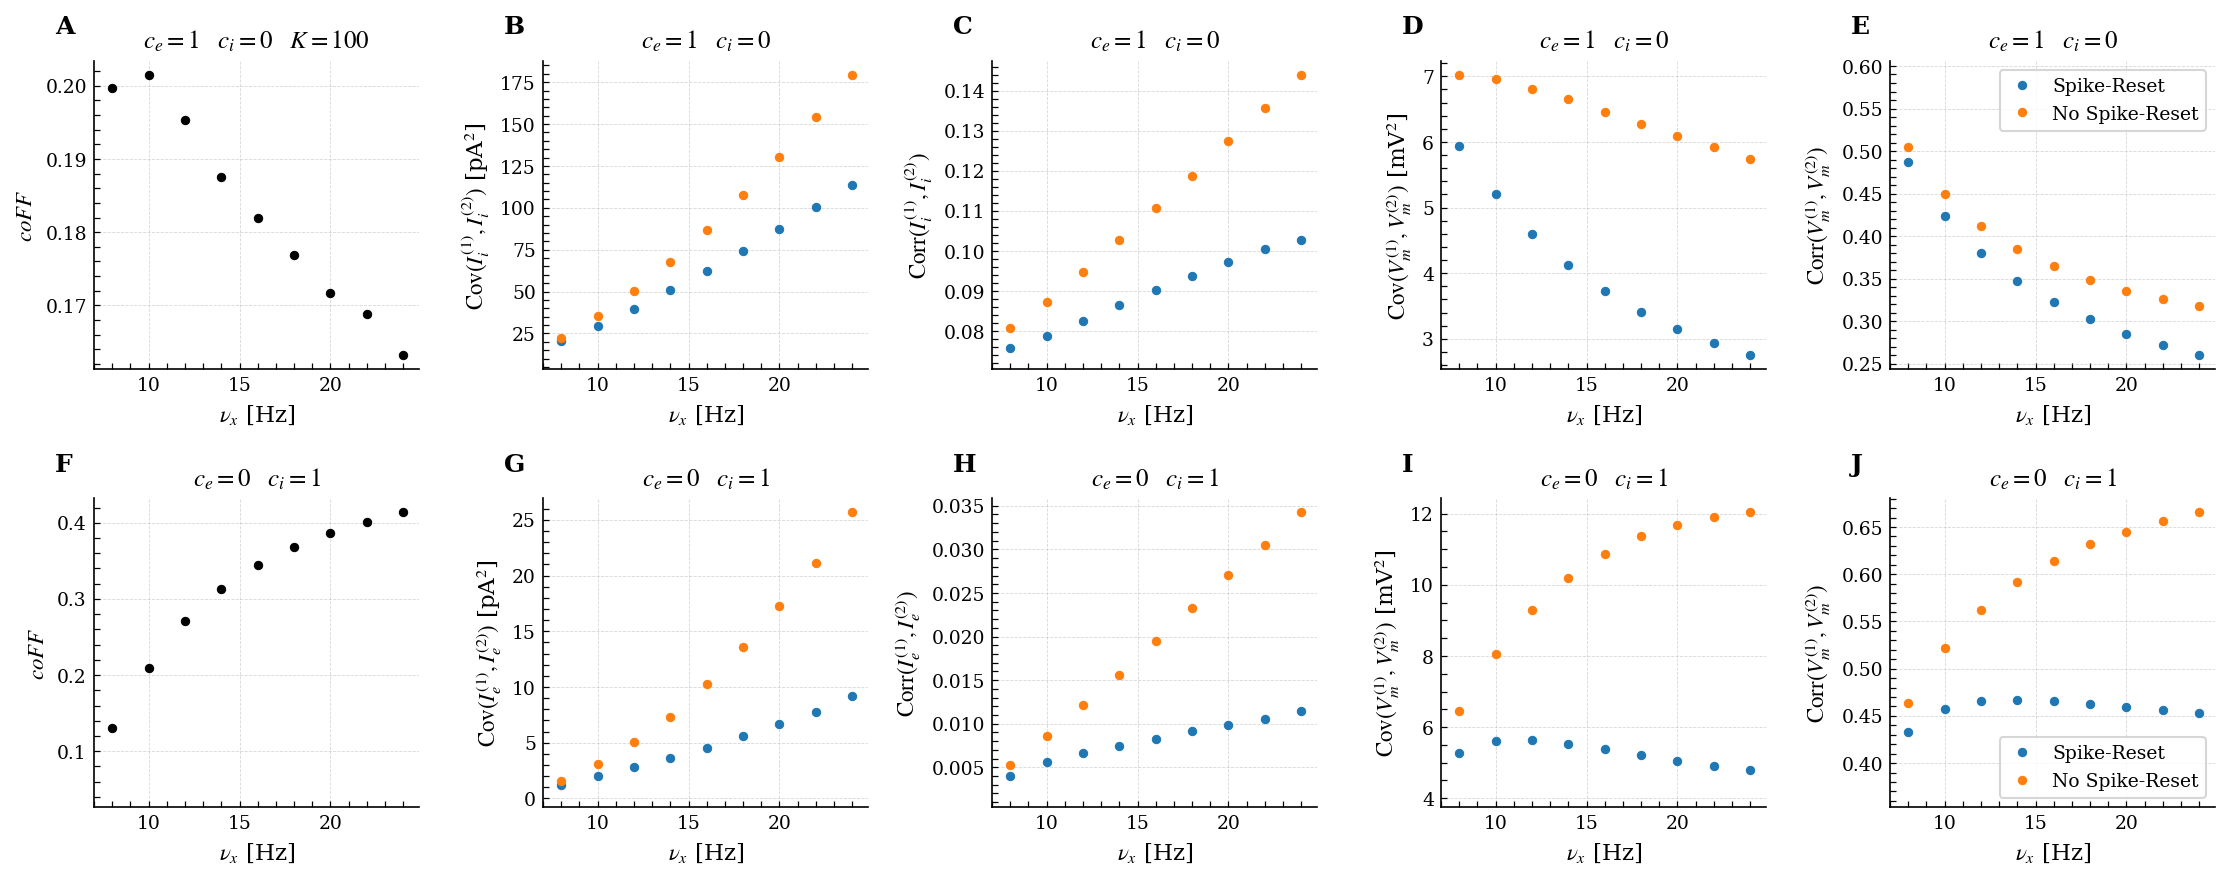

In [69]:
set_style()
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(2, 5, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={1}\quad c_i={0}\quad K={K}$", fontsize=12)

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_Ii1_Ii2"], 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ii1_Ii2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{i}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# normalize the covariance by the product of stds
ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_Ii1_Ii2"] / np.sqrt(df_E_shared_with_spike["var_I_i_1"] * df_E_shared_with_spike["var_I_i_2"]), 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ii1_Ii2"] / np.sqrt(df_E_shared_without_spike["var_I_i_1"] * df_E_shared_without_spike["var_I_i_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{i}^{(1)}, I_{i}^{(2)})$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_V1_V2"], 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_V1_V2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(V_{m}^{(1)}, V_{m}^{(2)})$ [mV$^2$]")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)

# normalize the covariance by the product of stds
ax = fig.add_subplot(gs[0, 4])
ax.plot(df_E_shared_with_spike["nu_x"], df_E_shared_with_spike["cov_V1_V2"] / np.sqrt(df_E_shared_with_spike["var_V_1"] * df_E_shared_with_spike["var_V_2"]), 'o', label="Spike-Reset")
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_V1_V2"] / np.sqrt(df_E_shared_without_spike["var_V_1"] * df_E_shared_without_spike["var_V_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(V_{m}^{(1)}, V_{m}^{(2)})$")
ax.set_title(rf"$c_e={1}\quad c_i={0}$", fontsize=12)
ax.legend(frameon=True)

ax = fig.add_subplot(gs[1, 0])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["co_fano_factor"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$coFF$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_Ie1_Ie2"], 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ie1_Ie2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{e}^{(1)}, I_{e}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

# normalize the covariance by the product of stds
ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_Ie1_Ie2"] / np.sqrt(df_I_shared_with_spike["var_I_e_1"] * df_I_shared_with_spike["var_I_e_2"]), 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ie1_Ie2"] / np.sqrt(df_I_shared_without_spike["var_I_e_1"] * df_I_shared_without_spike["var_I_e_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{e}^{(1)}, I_{e}^{(2)})$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_V1_V2"], 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_V1_V2"], 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(V_{m}^{(1)}, V_{m}^{(2)})$ [mV$^2$]")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)

ax = fig.add_subplot(gs[1, 4])
ax.plot(df_I_shared_with_spike["nu_x"], df_I_shared_with_spike["cov_V1_V2"] / np.sqrt(df_I_shared_with_spike["var_V_1"] * df_I_shared_with_spike["var_V_2"]), 'o', label="Spike-Reset")
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_V1_V2"] / np.sqrt(df_I_shared_without_spike["var_V_1"] * df_I_shared_without_spike["var_V_2"]), 'o', label="No Spike-Reset")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(V_{m}^{(1)}, V_{m}^{(2)})$")
ax.set_title(rf"$c_e={0}\quad c_i={1}$", fontsize=12)
ax.legend(frameon=True)

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
savefig(fig, "fig2.png")
plt.show()

# Figure 3: Analysis of Cov(I_1,I_2) for the four E-I terms

Saved figure to fig3.png


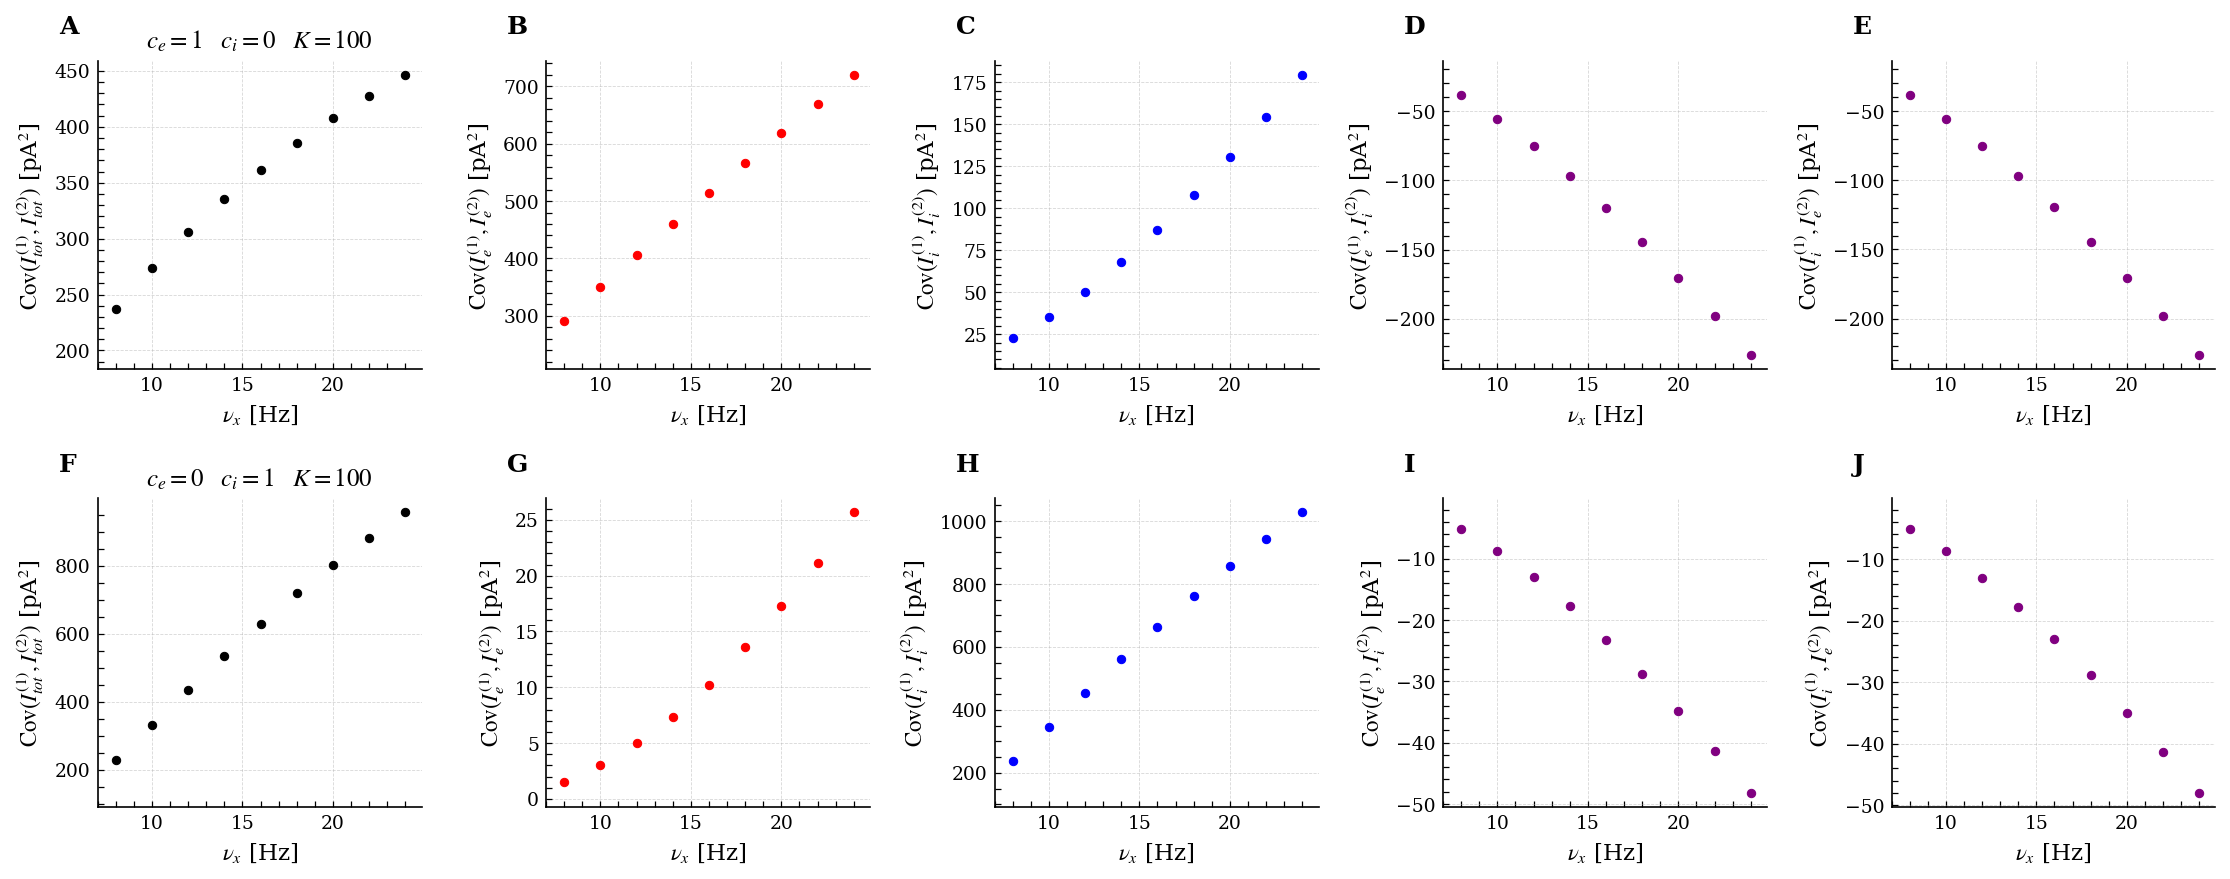

In [70]:
"""
Create 2 rows and 5 columns plot. Refer to the plot above as example layout. Use the without spike dataframes. First row use the E shared dataframe without spikes. In each column, plot the following results from the dataframe 
        "cov_Ie1_Ie2" => cov_Ie1_Ie2,
        "cov_Ii1_Ii2" => cov_Ii1_Ii2,
        "cov_Ie1_Ii2" => cov_Ie1_Ii2,
        "cov_Ii1_Ie2" => cov_Ii1_Ie2,
        "cov_It1_It2" => cov_It1_It2      no need for labels. all plots are black dots.
"""

set_style()
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(2, 5, figure=fig)

# First row: E shared without spikes

# cov_It1_It2
ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_It1_It2"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{tot}^{(1)}, I_{tot}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={1}\quad c_i={0}\quad K={K}$", fontsize=12)

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ie1_Ie2"], 'o', color="red")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{e}^{(1)}, I_{e}^{(2)})$ [pA$^2$]")

ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ii1_Ii2"], 'o', color="blue")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{i}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ie1_Ii2"], 'o', color="purple")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{e}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")

ax = fig.add_subplot(gs[0, 4])
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ii1_Ie2"], 'o', color="purple")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{i}^{(1)}, I_{e}^{(2)})$ [pA$^2$]")

# Second row: I shared without spikes

# cov_It1_It2
ax = fig.add_subplot(gs[1, 0])
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_It1_It2"], 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{tot}^{(1)}, I_{tot}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={0}\quad c_i={1}\quad K={K}$", fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ie1_Ie2"], 'o', color="red")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{e}^{(1)}, I_{e}^{(2)})$ [pA$^2$]")

ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ii1_Ii2"], 'o', color="blue")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{i}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ie1_Ii2"], 'o', color="purple")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{e}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")

ax = fig.add_subplot(gs[1, 4])
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ii1_Ie2"], 'o', color="purple")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Cov}(I_{i}^{(1)}, I_{e}^{(2)})$ [pA$^2$]")



for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
savefig(fig, "fig3.png")
plt.show()

# Fig 4: Correlations, same as Fig 3

Saved figure to fig4.png


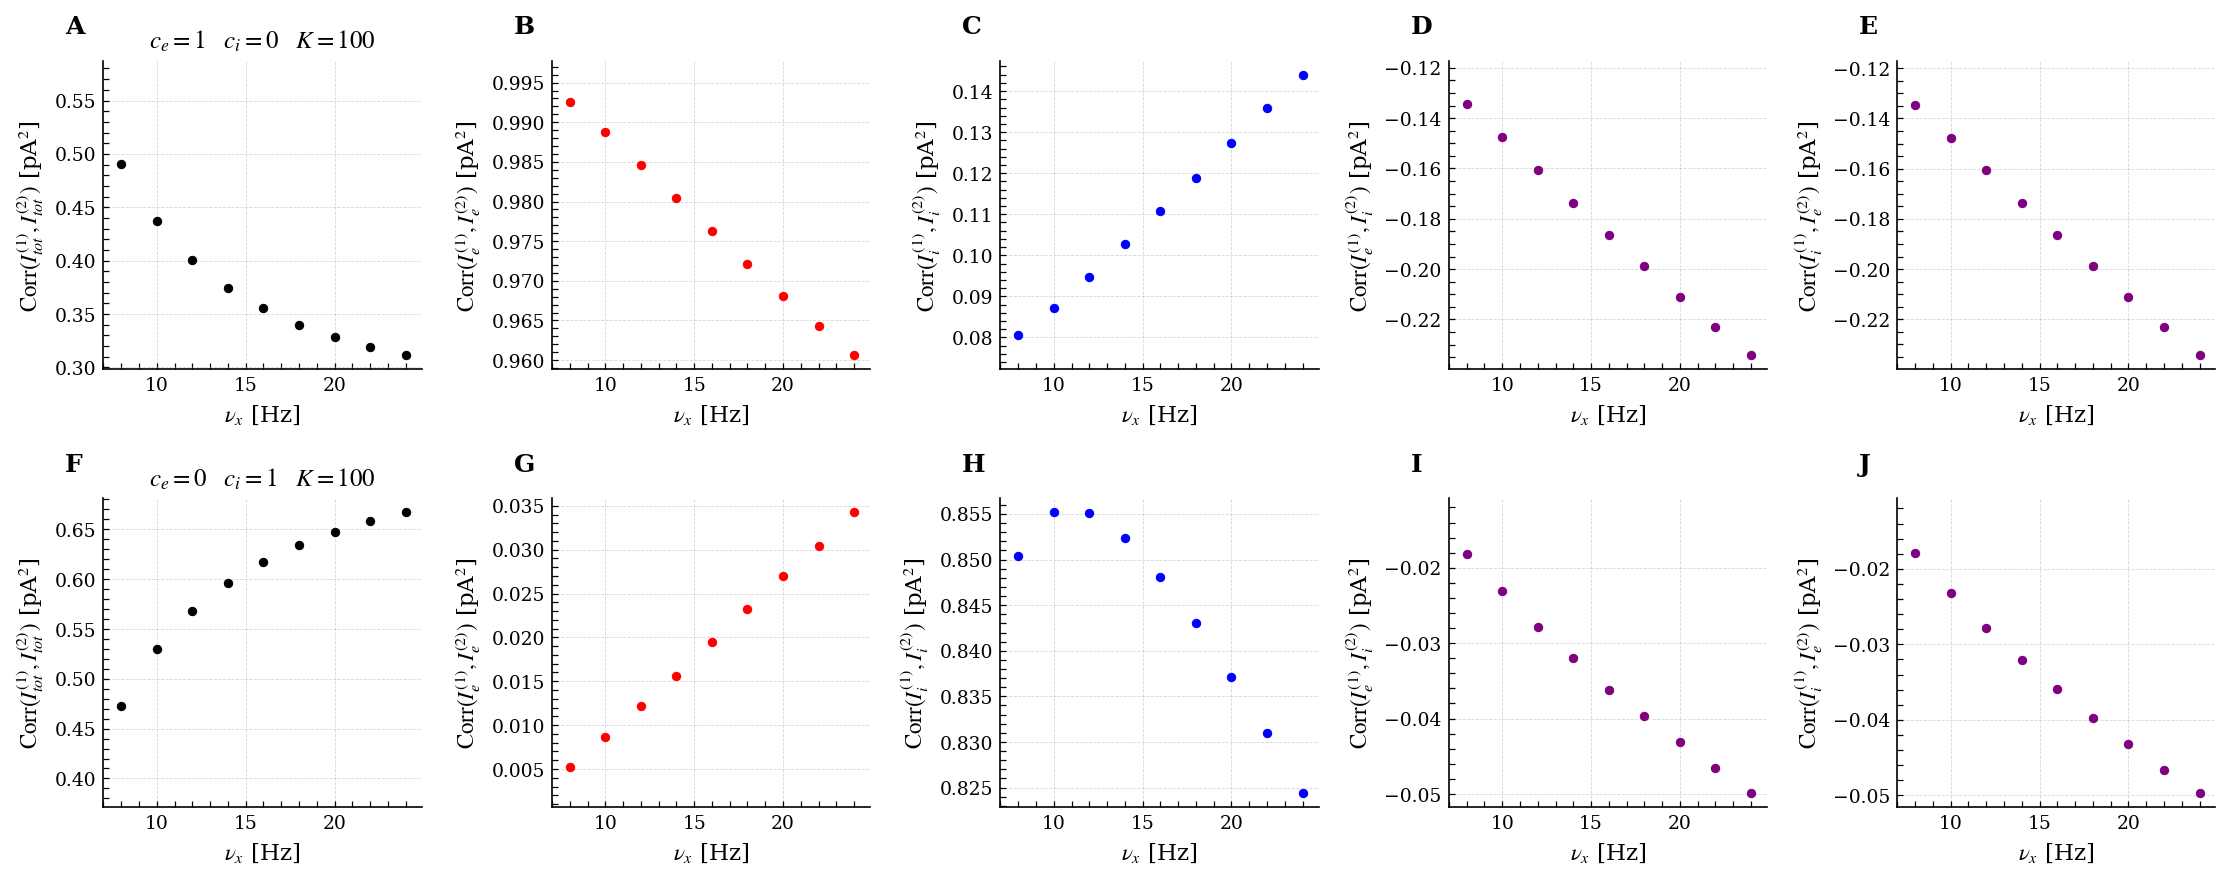

In [84]:
"""
Create 2 rows and 5 columns plot. Refer to the plot above as example layout. Use the without spike dataframes. First row use the E shared dataframe without spikes. In each column, plot the following results from the dataframe 
        "cov_Ie1_Ie2" => cov_Ie1_Ie2,
        "cov_Ii1_Ii2" => cov_Ii1_Ii2,
        "cov_Ie1_Ii2" => cov_Ie1_Ii2,
        "cov_Ii1_Ie2" => cov_Ii1_Ie2,
        "cov_It1_It2" => cov_It1_It2      no need for labels. all plots are black dots.
"""

set_style()
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(2, 5, figure=fig)

# First row: E shared without spikes

# cov_It1_It2
ax = fig.add_subplot(gs[0, 0])
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_It1_It2"] / np.sqrt(df_E_shared_without_spike["var_I_tot_1"] * df_E_shared_without_spike["var_I_tot_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{tot}^{(1)}, I_{tot}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={1}\quad c_i={0}\quad K={K}$", fontsize=12)

ax = fig.add_subplot(gs[0, 1])
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ie1_Ie2"] / np.sqrt(df_E_shared_without_spike["var_I_e_1"] * df_E_shared_without_spike["var_I_e_2"]), 'o', color="red")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{e}^{(1)}, I_{e}^{(2)})$ [pA$^2$]")

ax = fig.add_subplot(gs[0, 2])
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ii1_Ii2"] / np.sqrt(df_E_shared_without_spike["var_I_i_1"] * df_E_shared_without_spike["var_I_i_2"]), 'o', color="blue")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{i}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")

ax = fig.add_subplot(gs[0, 3])
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ie1_Ii2"] / np.sqrt(df_E_shared_without_spike["var_I_e_1"] * df_E_shared_without_spike["var_I_i_2"]), 'o', color="purple")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{e}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")

ax = fig.add_subplot(gs[0, 4])
ax.plot(df_E_shared_without_spike["nu_x"], df_E_shared_without_spike["cov_Ii1_Ie2"] / np.sqrt(df_E_shared_without_spike["var_I_i_1"] * df_E_shared_without_spike["var_I_e_2"]), 'o', color="purple")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{i}^{(1)}, I_{e}^{(2)})$ [pA$^2$]")

# Second row: I shared without spikes

# cov_It1_It2
ax = fig.add_subplot(gs[1, 0])
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_It1_It2"] / np.sqrt(df_I_shared_without_spike["var_I_tot_1"] * df_I_shared_without_spike["var_I_tot_2"]), 'o', color="black")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{tot}^{(1)}, I_{tot}^{(2)})$ [pA$^2$]")
ax.set_title(rf"$c_e={0}\quad c_i={1}\quad K={K}$", fontsize=12)

ax = fig.add_subplot(gs[1, 1])
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ie1_Ie2"] / np.sqrt(df_I_shared_without_spike["var_I_e_1"] * df_I_shared_without_spike["var_I_e_2"]), 'o', color="red")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{e}^{(1)}, I_{e}^{(2)})$ [pA$^2$]")

ax = fig.add_subplot(gs[1, 2])
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ii1_Ii2"] / np.sqrt(df_I_shared_without_spike["var_I_i_1"] * df_I_shared_without_spike["var_I_i_2"]), 'o', color="blue")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{i}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")

ax = fig.add_subplot(gs[1, 3])
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ie1_Ii2"] / np.sqrt(df_I_shared_without_spike["var_I_e_1"] * df_I_shared_without_spike["var_I_i_2"]), 'o', color="purple")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{e}^{(1)}, I_{i}^{(2)})$ [pA$^2$]")

ax = fig.add_subplot(gs[1, 4])
ax.plot(df_I_shared_without_spike["nu_x"], df_I_shared_without_spike["cov_Ii1_Ie2"] / np.sqrt(df_I_shared_without_spike["var_I_i_1"] * df_I_shared_without_spike["var_I_e_2"]), 'o', color="purple")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Corr}(I_{i}^{(1)}, I_{e}^{(2)})$ [pA$^2$]")



for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
savefig(fig, "fig4.png")
plt.show()

# Fig 5

Saved figure to fig5.png


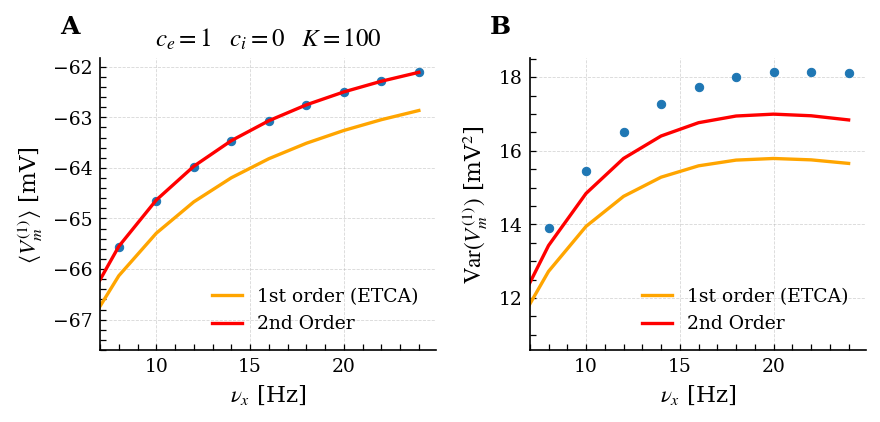

In [ ]:
params = params_E_shared_without_spike

g_L = params["g_L"]
C = params["C"]
tau_m = (C / g_L) / 1000.0  # convert to seconds
V_L = params["E_L"]
Vth = params["Vth"]
Vre = params["Vre"]
tau_ref = params["tau_ref"]
tau_e_decay = params["tau_e_decay"] / 1000.0  # convert to seconds
tau_i_decay = params["tau_i_decay"] / 1000.0  # convert to seconds
V_i = params["E_i"]
V_e = params["E_e"]
g = params["g"]
a = params["a"]
K = params["K"]
gamma = params["gamma"]
eta = params["eta"]
J_e = a
J_i = a * g
K_e = K
K_i = K * gamma

nu_xs = df["nu_x"].to_numpy()
# get the max and min nu_x
nu_x_min = np.min(nu_xs)
nu_x_max = np.max(nu_xs)
# generate a linspace of nu_xs from min to max with 100 points
# nu_x_space = np.linspace(nu_x_min, nu_x_max, 100)
nu_x_space = nu_xs

r_e = nu_x_space
r_i = nu_x_space * eta

mean_ge = J_e * tau_e_decay * r_e * K_e
mean_gi = J_i * tau_i_decay * r_i * K_i
var_ge = 0.5 * J_e**2 * tau_e_decay * r_e * K_e
var_gi = 0.5 * J_i**2 * tau_i_decay * r_i * K_i
g_tot_var_theory = var_ge + var_gi

V_0 = (g_L * V_L + mean_ge * V_e + mean_gi * V_i) / (g_L + mean_ge + mean_gi)
g_0 = g_L + mean_ge + mean_gi
tau_0 = (C / g_0) / 1000.0  # convert to seconds

# Effective time constant mean voltage
V_mean_theory_etc = V_0

# Estimated mean voltage including covariance corrections
V_mean_theory_cov = (g_L * V_L + mean_ge * V_e + mean_gi * V_i - df["cov_V_g_e_1"] - df["cov_V_g_i_1"]) / (g_L + mean_ge + mean_gi)

# Richardson 2005's correction on mean voltage
x_e2 = var_ge / g_0**2
x_i2 = var_gi / g_0**2
mu_V = - x_e2 * (V_e - V_0) * (tau_e_decay / (tau_0 + tau_e_decay)) - x_i2 * (V_i - V_0) * (tau_i_decay / (tau_0 + tau_i_decay))
V_mean_theory = V_0 + mu_V

# sigma_e2_theory = sigma_alpha2(tau_e_decay, J_e, r_e, K_e, V_e, V_0_theory, g_0_theory, tau_0_theory)
# sigma_i2_theory = sigma_alpha2(tau_i_decay, J_i, r_i, K_i, V_i, V_0_theory, g_0_theory, tau_0_theory)

sigma_e2_theory_etc = var_ge * (V_e - V_0)**2 * tau_e_decay / (g_0**2 * (tau_0 + tau_e_decay))
sigma_i2_theory_etc = var_gi * (V_i - V_0)**2 * tau_i_decay / (g_0**2 * (tau_0 + tau_i_decay))
V_var_theory_etc = sigma_e2_theory_etc + sigma_i2_theory_etc

sigma_e2_theory_cov = var_ge * (V_e - V_mean_theory_cov)**2 * tau_e_decay / (g_0**2 * (tau_0 + tau_e_decay))
sigma_i2_theory_cov = var_gi * (V_i - V_mean_theory_cov)**2 * tau_i_decay / (g_0**2 * (tau_0 + tau_i_decay))
V_var_theory_cov = sigma_e2_theory_cov + sigma_i2_theory_cov

sigma_e2_theory = var_ge * (V_e - V_mean_theory)**2 * tau_e_decay / (g_0**2 * (tau_0 + tau_e_decay))
sigma_i2_theory = var_gi * (V_i - V_mean_theory)**2 * tau_i_decay / (g_0**2 * (tau_0 + tau_i_decay))
V_var_theory = sigma_e2_theory + sigma_i2_theory

set_style()
fig = plt.figure(figsize=(6, 3))
gs = GridSpec(1, 2, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.plot(df["nu_x"], df["mean_V_1"], 'o')
ax.plot(df["nu_x"], V_mean_theory_etc, '-', color='orange', label="1st order (ETCA)")
# ax.plot(df["nu_x"], V_mean_theory_cov, '-', color='orange', label="ETC+Cov")
ax.plot(df["nu_x"], V_mean_theory, '-', color='red', label="2nd Order")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\langle V_m^{(1)} \rangle$ [mV]")
ax.set_title(rf"$c_e={1}\quad c_i={0}\quad K={K}$", fontsize=12)
ax.legend()

ax = fig.add_subplot(gs[0, 1])
ax.plot(df["nu_x"], df["var_V_1"], 'o')
ax.plot(df["nu_x"], V_var_theory_etc, '-', color='orange', label="1st order (ETCA)")
# ax.plot(df["nu_x"], V_var_theory_cov, '-', color='red', label="ETC+Cov")
ax.plot(df["nu_x"], V_var_theory, '-', color='red', label="2nd Order")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Var}(V_m^{(1)})$ [mV$^2$]")
ax.legend()

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
savefig(fig, "fig5.png")
plt.show()

# Fig 6

/var/folders/mb/f1_g1g0n1s13vfylsby2v1bm0000gn/T/ipykernel_45936/270993197.py:145: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Saved figure to fig6.png


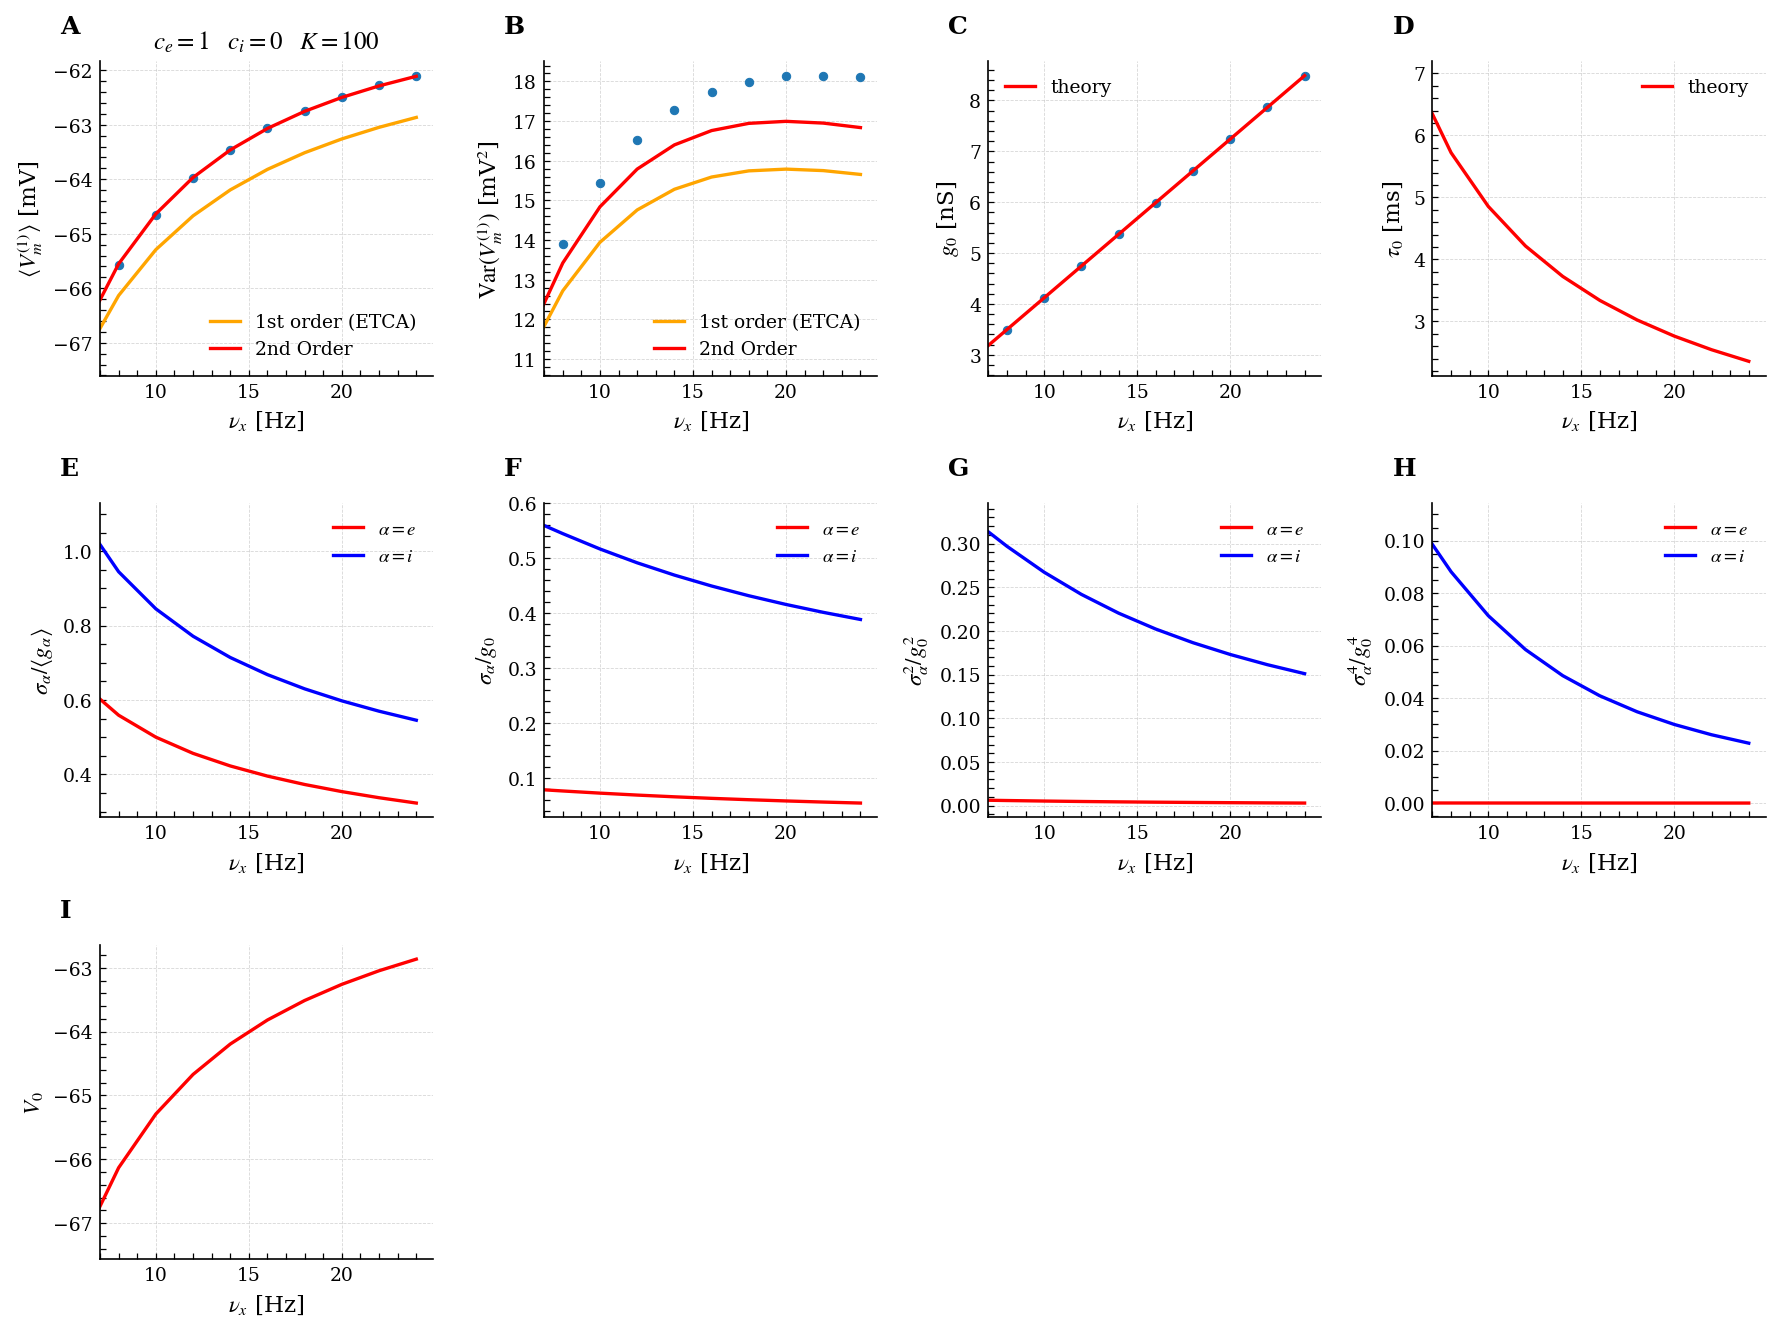

In [112]:
params = params_E_shared_without_spike
df = df_E_shared_without_spike

g_L = params["g_L"]
C = params["C"]
tau_m = (C / g_L) / 1000.0  # convert to seconds
V_L = params["E_L"]
Vth = params["Vth"]
Vre = params["Vre"]
tau_ref = params["tau_ref"]
tau_e_decay = params["tau_e_decay"] / 1000.0  # convert to seconds
tau_i_decay = params["tau_i_decay"] / 1000.0  # convert to seconds
V_i = params["E_i"]
V_e = params["E_e"]
g = params["g"]
a = params["a"]
K = params["K"]
gamma = params["gamma"]
eta = params["eta"]
J_e = a
J_i = a * g
K_e = K
K_i = K * gamma

nu_xs = df["nu_x"].to_numpy()
# get the max and min nu_x
nu_x_min = np.min(nu_xs)
nu_x_max = np.max(nu_xs)
# generate a linspace of nu_xs from min to max with 100 points
# nu_x_space = np.linspace(nu_x_min, nu_x_max, 100)
nu_x_space = nu_xs

r_e = nu_x_space
r_i = nu_x_space * eta

mean_ge = J_e * tau_e_decay * r_e * K_e
mean_gi = J_i * tau_i_decay * r_i * K_i
var_ge = 0.5 * J_e**2 * tau_e_decay * r_e * K_e
var_gi = 0.5 * J_i**2 * tau_i_decay * r_i * K_i
sigma_ge = np.sqrt(var_ge)
sigma_gi = np.sqrt(var_gi)
CV_ge = 1 / (np.sqrt(2 * tau_e_decay * r_e * K_e))
CV_gi = 1 / (np.sqrt(2 * tau_i_decay * r_i * K_i))
g_tot_var_theory = var_ge + var_gi

V_0 = (g_L * V_L + mean_ge * V_e + mean_gi * V_i) / (g_L + mean_ge + mean_gi)
g_0 = g_L + mean_ge + mean_gi
tau_0 = (C / g_0) / 1000.0  # convert to seconds

# Effective time constant mean voltage
V_mean_theory_etc = V_0

# Estimated mean voltage including covariance corrections
V_mean_theory_cov = (g_L * V_L + mean_ge * V_e + mean_gi * V_i - df["cov_V_g_e_1"] - df["cov_V_g_i_1"]) / (g_L + mean_ge + mean_gi)

# Richardson 2005's correction on mean voltage
x_e2 = var_ge / g_0**2
x_i2 = var_gi / g_0**2
x_e = np.sqrt(x_e2)
x_i = np.sqrt(x_i2)
mu_V = - x_e2 * (V_e - V_0) * (tau_e_decay / (tau_0 + tau_e_decay)) - x_i2 * (V_i - V_0) * (tau_i_decay / (tau_0 + tau_i_decay))
V_mean_theory = V_0 + mu_V

sigma_e2_theory_etc = var_ge * (V_e - V_0)**2 * tau_e_decay / (g_0**2 * (tau_0 + tau_e_decay))
sigma_i2_theory_etc = var_gi * (V_i - V_0)**2 * tau_i_decay / (g_0**2 * (tau_0 + tau_i_decay))
V_var_theory_etc = sigma_e2_theory_etc + sigma_i2_theory_etc

sigma_e2_theory_cov = var_ge * (V_e - V_mean_theory_cov)**2 * tau_e_decay / (g_0**2 * (tau_0 + tau_e_decay))
sigma_i2_theory_cov = var_gi * (V_i - V_mean_theory_cov)**2 * tau_i_decay / (g_0**2 * (tau_0 + tau_i_decay))
V_var_theory_cov = sigma_e2_theory_cov + sigma_i2_theory_cov

sigma_e2_theory = var_ge * (V_e - V_mean_theory)**2 * tau_e_decay / (g_0**2 * (tau_0 + tau_e_decay))
sigma_i2_theory = var_gi * (V_i - V_mean_theory)**2 * tau_i_decay / (g_0**2 * (tau_0 + tau_i_decay))
V_var_theory = sigma_e2_theory + sigma_i2_theory

set_style()
fig = plt.figure(figsize=(12, 9))
gs = GridSpec(3, 4, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.plot(nu_x_space, df["mean_V_1"], 'o')
ax.plot(nu_x_space, V_mean_theory_etc, '-', color='orange', label="1st order (ETCA)")
# ax.plot(df["nu_x"], V_mean_theory_cov, '-', color='orange', label="ETC+Cov")
ax.plot(nu_x_space, V_mean_theory, '-', color='red', label="2nd Order")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\langle V_m^{(1)} \rangle$ [mV]")
ax.set_title(rf"$c_e={1}\quad c_i={0}\quad K={K}$", fontsize=12)
ax.legend()

ax = fig.add_subplot(gs[0, 1])
ax.plot(nu_x_space, df["var_V_1"], 'o')
ax.plot(nu_x_space, V_var_theory_etc, '-', color='orange', label="1st order (ETCA)")
# ax.plot(df["nu_x"], V_var_theory_cov, '-', color='red', label="ETC+Cov")
ax.plot(nu_x_space, V_var_theory, '-', color='red', label="2nd Order")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Var}(V_m^{(1)})$ [mV$^2$]")
ax.legend()

# plot g_0_theory
ax = fig.add_subplot(gs[0, 2])
ax.plot(nu_x_space, df["mean_g_0_1"], 'o')
ax.plot(nu_x_space, g_0, '-', color='red', label="theory")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$g_0$ [nS]")
ax.legend()

ax = fig.add_subplot(gs[0, 3])
ax.plot(nu_x_space, tau_0 * 1000, '-', color='red', label="theory")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\tau_0$ [ms]")
ax.legend()

ax = fig.add_subplot(gs[1, 0])
ax.plot(nu_x_space, CV_ge, '-', color='red', label=r"$\alpha=e$")
ax.plot(nu_x_space, CV_gi, '-', color='blue', label=r"$\alpha=i$")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\sigma_\alpha / \langle g_\alpha \rangle$")
ax.legend()

ax = fig.add_subplot(gs[1, 1])
ax.plot(nu_x_space, x_e, '-', color='red', label=r"$\alpha=e$")
ax.plot(nu_x_space, x_i, '-', color='blue', label=r"$\alpha=i$")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\sigma_\alpha / g_0$")
ax.legend()

ax = fig.add_subplot(gs[1, 2])
ax.plot(nu_x_space, x_e2, '-', color='red', label=r"$\alpha=e$")
ax.plot(nu_x_space, x_i2, '-', color='blue', label=r"$\alpha=i$")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\sigma_\alpha^2 / g_0^2$")
ax.legend()

ax = fig.add_subplot(gs[1, 3])
ax.plot(nu_x_space, x_e**4, '-', color='red', label=r"$\alpha=e$")
ax.plot(nu_x_space, x_i**4, '-', color='blue', label=r"$\alpha=i$")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\sigma_\alpha^4 / g_0^4$")
ax.legend()

ax = fig.add_subplot(gs[2, 0])
ax.plot(nu_x_space, V_0, '-', color='red')
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$V_0$")
ax.legend()

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.set_xlim(left=7)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
savefig(fig, "fig6.png")
plt.show()

## Analysis of fluctuation

In [138]:
# without spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/synaptic_decay/share_E_no_SR_less_fluc/20251031-104452-QG62FfcC")

c_e, c_i = 1.0, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df_high_K = pd.DataFrame(rows)
df_high_K = df_high_K.sort_values(by="nu_x")
params_high_K = params

# without spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/synaptic_decay/share_E_no_SR_less_fluc/20251031-105452-lxwfadiT")

c_e, c_i = 1.0, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df_high_K_spike = pd.DataFrame(rows)
df_high_K_spike = df_high_K_spike.sort_values(by="nu_x")
params_high_K_spike = params

In [128]:
# without spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/synaptic_decay/share_E_no_SR_less_fluc/20251031-105012-qBoqsGAe")

c_e, c_i = 1.0, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")

In [130]:
# without spike, only E shared

trials = collect_data("../../outputs/conductance/double_lif/synaptic_decay/share_E_no_SR_less_fluc/20251031-105138-rAtdO3QS")

c_e, c_i = 1.0, 0.0

rows = []
for params, results in trials:
    row = {}
    if params["c_e"] == c_e and params["c_i"] == c_i:
        row.update(params)
        for k, v in results.items():
            if np.ndim(v) == 0 or (isinstance(v, np.ndarray) and v.size == 1):
                row[k] = float(np.ravel(v)[0])
            elif (isinstance(v, np.ndarray) and v.size == 2):
                row[k+"_1"] = float(v[0])
                row[k+"_2"] = float(v[1])
        rows.append(row)
df = pd.DataFrame(rows)
df = df.sort_values(by="nu_x")

/var/folders/mb/f1_g1g0n1s13vfylsby2v1bm0000gn/T/ipykernel_45936/1696506460.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/var/folders/mb/f1_g1g0n1s13vfylsby2v1bm0000gn/T/ipykernel_45936/1696506460.py:110: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/var/folders/mb/f1_g1g0n1s13vfylsby2v1bm0000gn/T/ipykernel_45936/1696506460.py:144: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


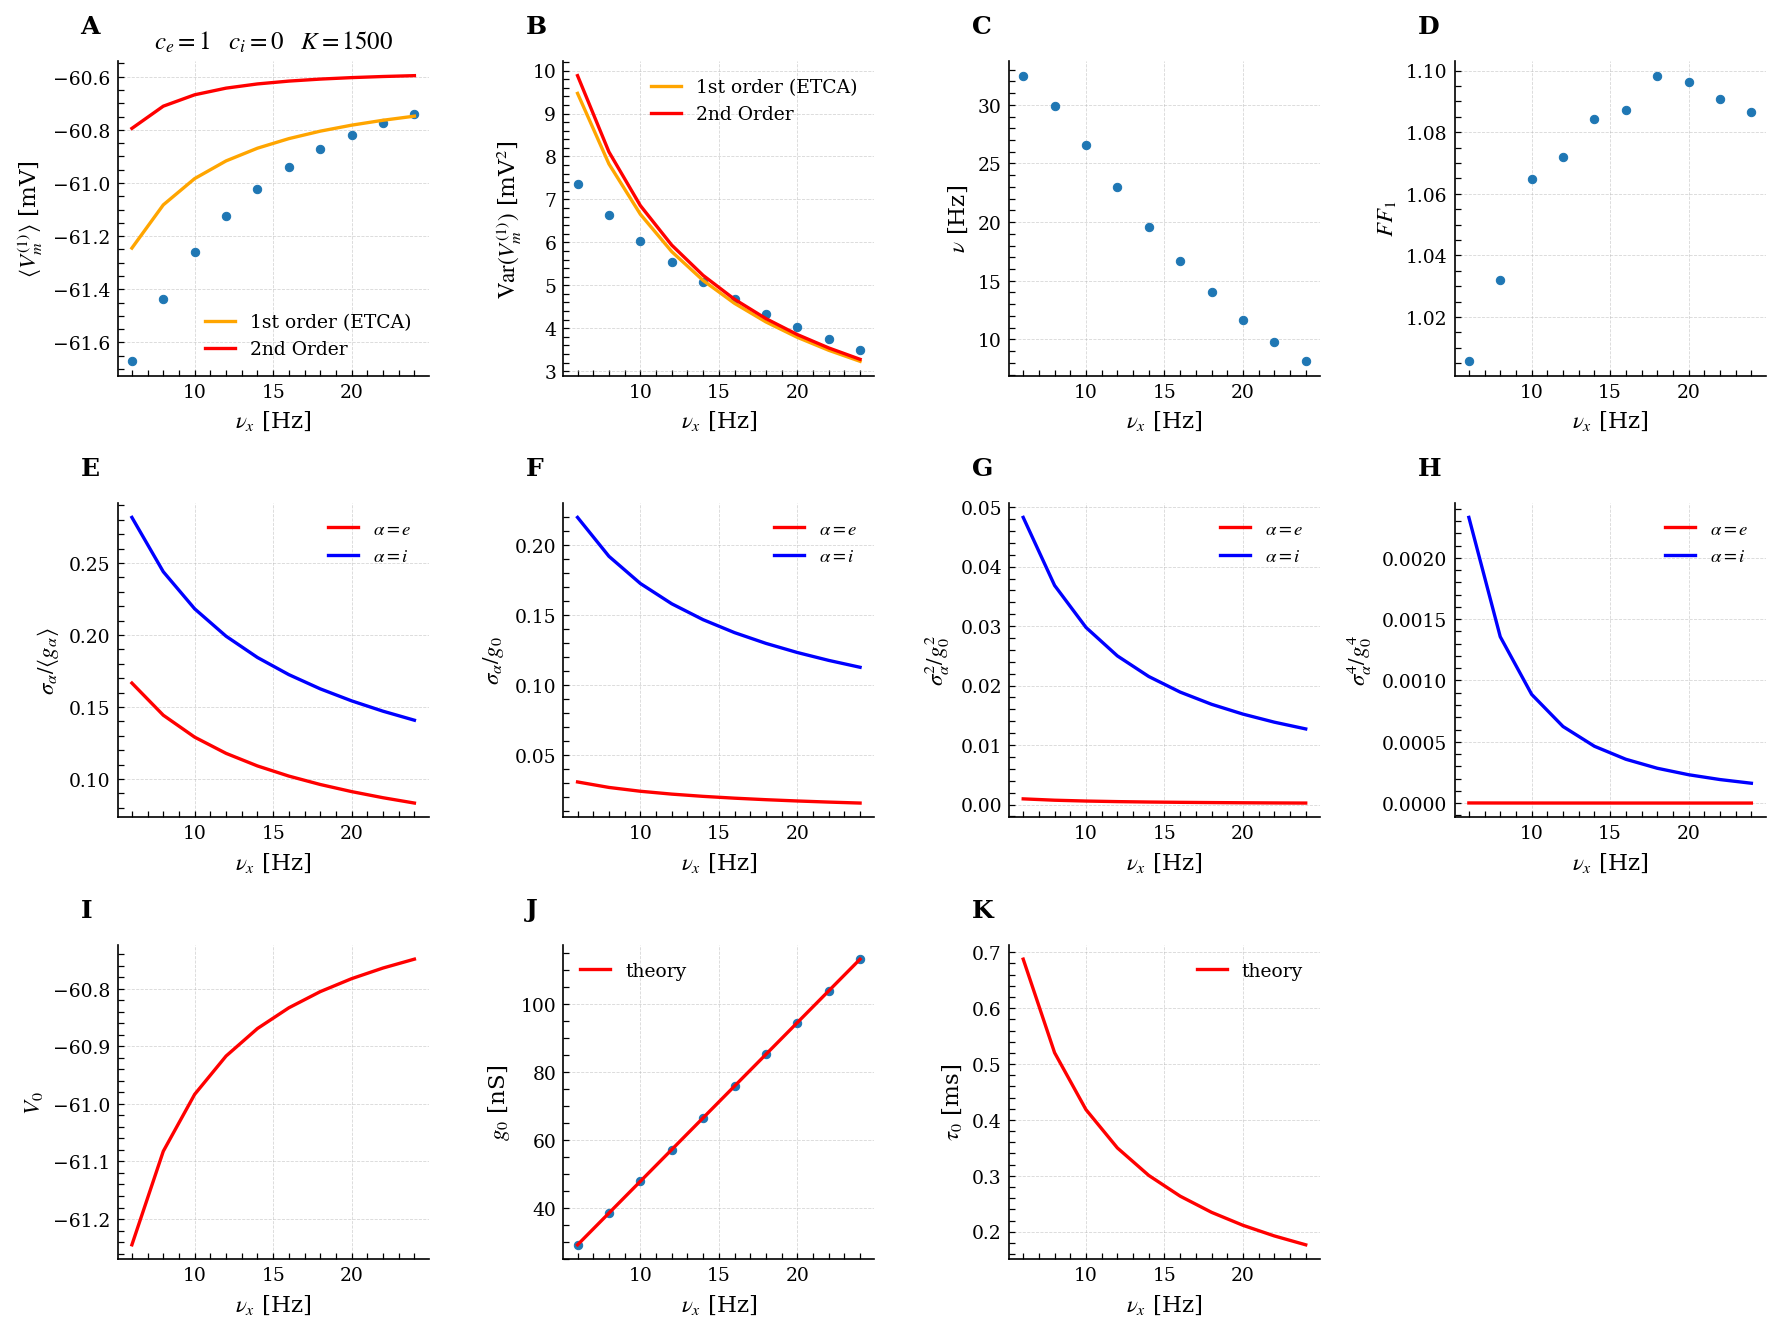

In [139]:
params = params_high_K_spike
df = df_high_K_spike

g_L = params["g_L"]
C = params["C"]
tau_m = (C / g_L) / 1000.0  # convert to seconds
V_L = params["E_L"]
Vth = params["Vth"]
Vre = params["Vre"]
tau_ref = params["tau_ref"]
tau_e_decay = params["tau_e_decay"] / 1000.0  # convert to seconds
tau_i_decay = params["tau_i_decay"] / 1000.0  # convert to seconds
V_i = params["E_i"]
V_e = params["E_e"]
g = params["g"]
a = params["a"]
K = params["K"]
gamma = params["gamma"]
eta = params["eta"]
J_e = a
J_i = a * g
K_e = K
K_i = K * gamma

nu_xs = df["nu_x"].to_numpy()
# get the max and min nu_x
nu_x_min = np.min(nu_xs)
nu_x_max = np.max(nu_xs)
# generate a linspace of nu_xs from min to max with 100 points
# nu_x_space = np.linspace(nu_x_min, nu_x_max, 100)
nu_x_space = nu_xs

r_e = nu_x_space
r_i = nu_x_space * eta

mean_ge = J_e * tau_e_decay * r_e * K_e
mean_gi = J_i * tau_i_decay * r_i * K_i
var_ge = 0.5 * J_e**2 * tau_e_decay * r_e * K_e
var_gi = 0.5 * J_i**2 * tau_i_decay * r_i * K_i
sigma_ge = np.sqrt(var_ge)
sigma_gi = np.sqrt(var_gi)
CV_ge = 1 / (np.sqrt(2 * tau_e_decay * r_e * K_e))
CV_gi = 1 / (np.sqrt(2 * tau_i_decay * r_i * K_i))
g_tot_var_theory = var_ge + var_gi

V_0 = (g_L * V_L + mean_ge * V_e + mean_gi * V_i) / (g_L + mean_ge + mean_gi)
g_0 = g_L + mean_ge + mean_gi
tau_0 = (C / g_0) / 1000.0  # convert to seconds

# Effective time constant mean voltage
V_mean_theory_etc = V_0

# Estimated mean voltage including covariance corrections
V_mean_theory_cov = (g_L * V_L + mean_ge * V_e + mean_gi * V_i - df["cov_V_g_e_1"] - df["cov_V_g_i_1"]) / (g_L + mean_ge + mean_gi)

# Richardson 2005's correction on mean voltage
x_e2 = var_ge / g_0**2
x_i2 = var_gi / g_0**2
x_e = np.sqrt(x_e2)
x_i = np.sqrt(x_i2)
mu_V = - x_e2 * (V_e - V_0) * (tau_e_decay / (tau_0 + tau_e_decay)) - x_i2 * (V_i - V_0) * (tau_i_decay / (tau_0 + tau_i_decay))
V_mean_theory = V_0 + mu_V

sigma_e2_theory_etc = var_ge * (V_e - V_0)**2 * tau_e_decay / (g_0**2 * (tau_0 + tau_e_decay))
sigma_i2_theory_etc = var_gi * (V_i - V_0)**2 * tau_i_decay / (g_0**2 * (tau_0 + tau_i_decay))
V_var_theory_etc = sigma_e2_theory_etc + sigma_i2_theory_etc

sigma_e2_theory_cov = var_ge * (V_e - V_mean_theory_cov)**2 * tau_e_decay / (g_0**2 * (tau_0 + tau_e_decay))
sigma_i2_theory_cov = var_gi * (V_i - V_mean_theory_cov)**2 * tau_i_decay / (g_0**2 * (tau_0 + tau_i_decay))
V_var_theory_cov = sigma_e2_theory_cov + sigma_i2_theory_cov

sigma_e2_theory = var_ge * (V_e - V_mean_theory)**2 * tau_e_decay / (g_0**2 * (tau_0 + tau_e_decay))
sigma_i2_theory = var_gi * (V_i - V_mean_theory)**2 * tau_i_decay / (g_0**2 * (tau_0 + tau_i_decay))
V_var_theory = sigma_e2_theory + sigma_i2_theory

set_style()
fig = plt.figure(figsize=(12, 9))
gs = GridSpec(3, 4, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.plot(nu_x_space, df["mean_V_1"], 'o')
ax.plot(nu_x_space, V_mean_theory_etc, '-', color='orange', label="1st order (ETCA)")
# ax.plot(df["nu_x"], V_mean_theory_cov, '-', color='orange', label="ETC+Cov")
ax.plot(nu_x_space, V_mean_theory, '-', color='red', label="2nd Order")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\langle V_m^{(1)} \rangle$ [mV]")
ax.set_title(rf"$c_e={1}\quad c_i={0}\quad K={K}$", fontsize=12)
ax.legend()

ax = fig.add_subplot(gs[0, 1])
ax.plot(nu_x_space, df["var_V_1"], 'o')
ax.plot(nu_x_space, V_var_theory_etc, '-', color='orange', label="1st order (ETCA)")
# ax.plot(df["nu_x"], V_var_theory_cov, '-', color='red', label="ETC+Cov")
ax.plot(nu_x_space, V_var_theory, '-', color='red', label="2nd Order")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\mathrm{Var}(V_m^{(1)})$ [mV$^2$]")
ax.legend()

# plot nu and ff
ax = fig.add_subplot(gs[0, 2])
ax.plot(nu_x_space, df["nu_1"], 'o')
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\nu$ [Hz]")
ax.legend()

ax = fig.add_subplot(gs[0, 3])
ax.plot(nu_x_space, df["fano_factor_1"], 'o')
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$FF_1$")
ax.legend()

ax = fig.add_subplot(gs[1, 0])
ax.plot(nu_x_space, CV_ge, '-', color='red', label=r"$\alpha=e$")
ax.plot(nu_x_space, CV_gi, '-', color='blue', label=r"$\alpha=i$")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\sigma_\alpha / \langle g_\alpha \rangle$")
ax.legend()

ax = fig.add_subplot(gs[1, 1])
ax.plot(nu_x_space, x_e, '-', color='red', label=r"$\alpha=e$")
ax.plot(nu_x_space, x_i, '-', color='blue', label=r"$\alpha=i$")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\sigma_\alpha / g_0$")
ax.legend()

ax = fig.add_subplot(gs[1, 2])
ax.plot(nu_x_space, x_e2, '-', color='red', label=r"$\alpha=e$")
ax.plot(nu_x_space, x_i2, '-', color='blue', label=r"$\alpha=i$")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\sigma_\alpha^2 / g_0^2$")
ax.legend()

ax = fig.add_subplot(gs[1, 3])
ax.plot(nu_x_space, x_e**4, '-', color='red', label=r"$\alpha=e$")
ax.plot(nu_x_space, x_i**4, '-', color='blue', label=r"$\alpha=i$")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\sigma_\alpha^4 / g_0^4$")
ax.legend()

ax = fig.add_subplot(gs[2, 0])
ax.plot(nu_x_space, V_0, '-', color='red')
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$V_0$")
ax.legend()

ax = fig.add_subplot(gs[2, 1])
ax.plot(nu_x_space, df["mean_g_0_1"], 'o')
ax.plot(nu_x_space, g_0, '-', color='red', label="theory")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$g_0$ [nS]")
ax.legend()

ax = fig.add_subplot(gs[2, 2])
ax.plot(nu_x_space, tau_0 * 1000, '-', color='red', label="theory")
ax.set_xlabel(r"$\nu_x$ [Hz]")
ax.set_ylabel(r"$\tau_0$ [ms]")
ax.legend()

for i, ax in enumerate(fig.axes):
    ax.tick_params(which="both", width=0.6, length=3)
    ax.text(-0.12, 1.15, chr(65+i), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va="top", ha="left")

plt.tight_layout()
# savefig(fig, "fig6.png")
plt.show()